In [4]:
import ujson
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
FEATURE_POS = ["NNG", "VV", "VA", "MDT", "MAG"]
POS_KEY = "lyric_pos"
LABEL_KEY = "genre"

def read_documents_with_labels(input_file_name):
    """주어진 이름을 파일에서 문서와 레이블들을 읽어서 돌려준다."""
    
    documents = []
    labels = []

    with open(input_file_name, "r", encoding="utf-8") as input_file:
        for line in input_file:
            words = []
            json_obj = ujson.loads(line)
            label = json_obj[LABEL_KEY]
            labels.append(label)

            for sent_anal in json_obj[POS_KEY]:
                for word, pos in sent_anal:
                    if pos not in FEATURE_POS:
                        continue

                    # 형태소 어형과 품사를 하나의 문자열로 결합하여 사용한다.
                    words.append(word + "/" + pos)

            document = " ".join(words)
            documents.append(document)

    # 파이썬 리스트를 numpy 모듈의 배열(array)로 변환 
    documents = np.asarray(documents)
    labels = np.asarray(labels)
    
    return documents, labels


def build_pipeline():
    """벡터라이저와 분류자의 파이프라인을 생성하여 돌려준다."""
    
    my_stop_words = ["o"]
    
    vectorizer = TfidfVectorizer(max_features=300, tokenizer=str.split, stop_words= my_stop_words)
    
    clf = MultinomialNB(alpha=0.1)
    pipeline = Pipeline([
        ('vect', vectorizer),
        ('clf', clf),
    ])
    
    return pipeline


def main():
    global test_labels, pred_labels
    """뉴스 문서 집합에 대한 카데고리 분류를 수행한다."""
    
    input_file_name = r"/Users/baekseoin/Desktop/19_1학기/텍스트 분석기법/프로젝트/data/lyrics_pos.txt"
    documents, labels = read_documents_with_labels(input_file_name)
    pipe_line = build_pipeline()
    
    VALIDATION_SPLIT = 0.3

    np.random.seed(1234)

    perm = np.random.permutation(len(documents))
    idx_train = perm[:int(len(documents)*(1-VALIDATION_SPLIT))]
    idx_test = perm[int(len(documents)*(1-VALIDATION_SPLIT)):]

    train_documents = documents[idx_train]
    train_labels = labels[idx_train]
    test_documents = documents[idx_test]
    test_labels = labels[idx_test]

    pipe_line.fit(train_documents, train_labels)
    pred_labels = pipe_line.predict(test_documents)

    accuracy = accuracy_score(test_labels, pred_labels)
 
    print('The accuracy on testing set is: {0:.1f}%'.format(accuracy*100))
    
# 실행 
main()



The accuracy on testing set is: 44.4%


In [5]:
import pandas as pd

A = pd.crosstab(test_labels, pred_labels, rownames=['True'], colnames=['Predicted'], margins=False)
A.columns
A.index = ["발라드","댄스","힙합","트로트","락","일렉트로닉"]
A.index.name = '실제값'
A.columns = ["발라드","댄스","힙합","트로트","락","일렉트로닉"]
A.columns.name = '예측값'
A



예측값,발라드,댄스,힙합,트로트,락,일렉트로닉
실제값,,,,,,
발라드,298,67,41,17,33,30
댄스,119,193,69,4,19,57
힙합,81,44,266,12,9,26
트로트,70,11,17,309,15,7
락,213,51,54,37,75,44
일렉트로닉,127,121,75,17,53,91


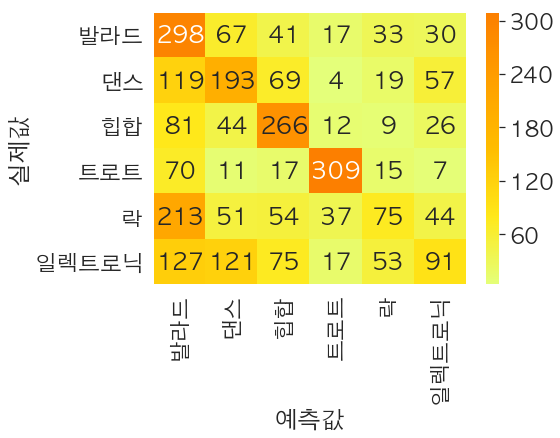

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
import seaborn as sns
%matplotlib inline
sns.set(font_scale=2)
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

A.index=['발라드','댄스','힙합','트로트','락','일렉트로닉']
#result.columns=['ballad','dance','hiphop','trot','rock','electronic']
A.columns=['발라드','댄스','힙합','트로트','락','일렉트로닉']
A.index.name="실제값"
A.columns.name="예측값"

plt.figure(figsize=(7,5))
sns.heatmap(A, annot=True, cmap="Wistia", fmt="d")